# Лабораторная работа №1

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from matplotlib.lines import Line2D
%matplotlib inline

## 1.	Загрузите данные в ноутбук

In [1]:
import pandas as pd

In [13]:
df = pd.read_excel("v3.xlsx", header=2, skipfooter=1)
df.head()

,№,№ школы,Класс,Пол,Номер варианта,Задания с кратким ответом,Задания с развёрнутым ответом,Устная часть,Первичный балл,Балл,Минимальный балл
0,1,152,11,М,333,----001---00---000--1-+0---,0(3)0(3)0(3)0(3)0(3),NaN,3,10,36
1,2,140,12,Ж,332,----100---01-+-000--0--1---,0(3)0(3)0(3)0(3)0(3),NaN,4,14,36
2,3,137,11,М,328,--+-010---00---101--0--1---,0(3)0(3)0(3)0(3)0(3),NaN,5,17,36
3,4,148,11,М,333,-+--000--+01---100--0--1---,0(3)0(3)0(3)0(3)0(3),NaN,5,17,36
4,5,153,11,Ж,333,-+--100---00---100-+0--1---,0(3)0(3)0(3)0(3)0(3),NaN,5,17,36


## 2.	Сделайте описательную статистику по среднему баллу

In [14]:
df['Балл'].describe()

count    1180.000000
mean       52.047458
std        14.965477
min        10.000000
25%        41.000000
50%        49.000000
75%        60.250000
max       100.000000
Name: Балл, dtype: float64

52.047457627118646

## 3.	Найдите процент учащихся, выполнивших работу ниже среднего

In [26]:
print('Процент учащихся, набравших меньше среднего =', round(df[df['Балл'] < df['Балл'].describe()['mean']].shape[0] / df.shape[0] * 100, 2), '%')

Процент учащихся, набравших меньше среднего = 56.27 %


## 4.	Найти процент учащихся не сдавших экзамен

In [27]:
print('Процент учащихся, набравших меньше среднего =', round(df[df['Балл'] < df['Минимальный балл']].shape[0] / df.shape[0] * 100, 2), '%')

Процент учащихся, набравших меньше среднего = 7.71 %


## 5.	Постройте круговую диаграмму, показывающую распределение сдавших и не сдавших экзамен

[Text(0.5, 1.0, 'Распределение сдавших/не сдавших')]

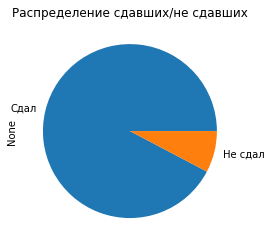

In [31]:
s = (df['Балл'] >= df['Минимальный балл']).value_counts()
s.index = s.index.map({False: 'Не сдал', True: 'Сдал'})
s.plot.pie().set(title='Распределение сдавших/не сдавших')

## 6.	Постройте гистограмму по распределению баллов за экзамен. Соответствует ли оно нормальному распределению?

<AxesSubplot:xlabel='Балл', ylabel='Count'>

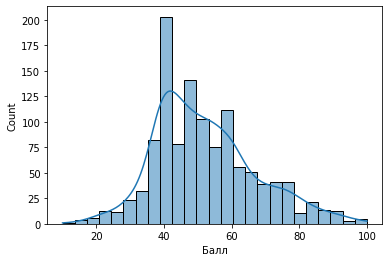

In [34]:
sns.histplot(x=df['Балл'], kde=True, ax=plt.subplots()[1])

Нормальному распределению соответствует

## 7.	Постройте оценку ядерной плотности распределению баллов за экзамен

<AxesSubplot:xlabel='Балл', ylabel='Density'>

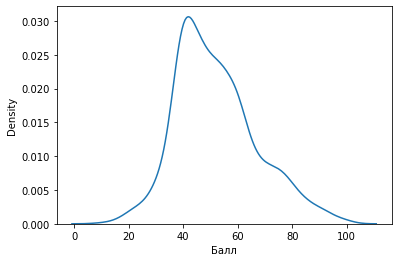

In [35]:
sns.kdeplot(x=df['Балл'], ax=plt.subplots()[1])

## 8.	Найдите процентное соотношение учащихся, сдавших экзамен на «отлично», «хорошо», «удовлетворительно», «неудовлетворительно». Сделайте графическое представление данного распределения

In [36]:
def rating(score, min_score, max_score):
    return round(score[(score >= min_score) & (score <= max_score)].shape[0] / score.shape[0] * 100, 2)

C:\Users\anast\AppData\Local\Temp/ipykernel_8680/2135561281.py:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  s = pd.Series({})


[Text(0.5, 1.0, 'Распределение сдавших / не сдавших экзамен')]

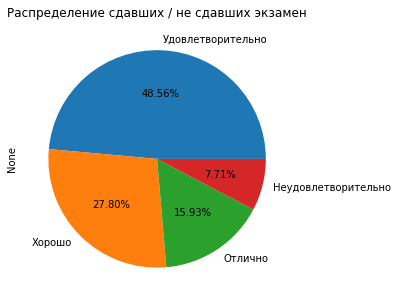

In [43]:
s = pd.Series({})
s['Удовлетворительно'] = rating(df['Балл'], 36, 52)
s['Хорошо'] = rating(df['Балл'], 53, 67)
s['Отлично'] = rating(df['Балл'], 68, 100)
s['Неудовлетворительно'] = rating(df['Балл'], 0, 35)

s.plot.pie(figsize=(5, 5), autopct='%1.2f%%').set(title='Распределение сдавших / не сдавших экзамен')

## 9.	Постройте «ящиковые диаграммы», сравнивающие баллы учащихся, сдавших экзамен на «отлично», «хорошо», «удовлетворительно», «неудовлетворительно»

<AxesSubplot:>

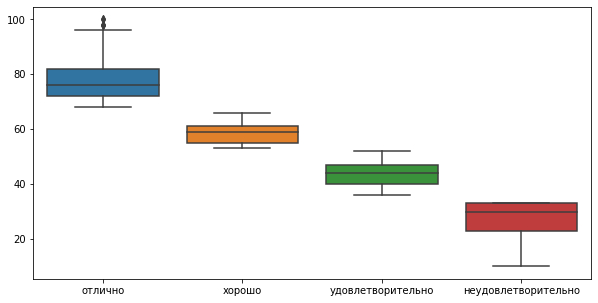

In [45]:
data = pd.DataFrame({
'отлично': df['Балл'][((df['Балл'] >= 68) & (df['Балл'] <= 100))],
'хорошо': df['Балл'][((df['Балл'] >= 53) & (df['Балл'] <= 67))],
'удовлетворительно': df['Балл'][((df['Балл'] >= 36) & (df['Балл'] <= 52))],
'неудовлетворительно': df['Балл'][((df['Балл'] >= 0) & (df['Балл'] <= 35))]
})

sns.boxplot(data=data, ax=plt.subplots(figsize=(10, 5))[1])

## 10.	Какое процентное соотношение юношей и девушек писало данный экзамен? Представьте графически

<AxesSubplot:ylabel='Пол'>

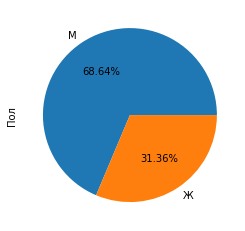

In [51]:
df['Пол'].value_counts().plot.pie(autopct='%1.2f%%')

## 11.	Постройте диаграмму рассеивания, позволяющую увидеть средние баллы девушек и юношей

Пол
Ж    AxesSubplot(0.125,0.125;0.775x0.755)
М    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Балл, dtype: object

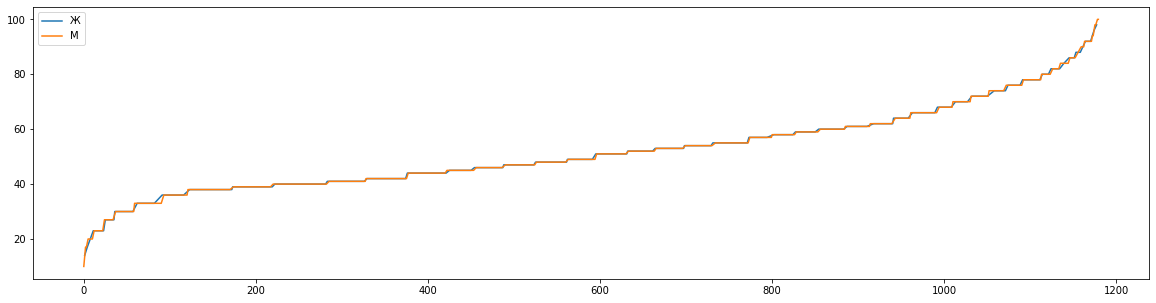

In [50]:
df.groupby('Пол')['Балл'].plot(figsize=(20, 5), legend=True)

## 12.	Сколько школ (код ППЕ) принимало участие в экзамене?

In [56]:
print('В экзамене принимало участие', len(df['№ школы'].unique()), 'школ')

В экзамене принимало участие 19 школ


## 13.	Постройте диаграмму, позволяющую сравнить средние баллы за экзамен по школам. Если какие-нибудь выбросы?

<AxesSubplot:xlabel='№ школы', ylabel='Балл'>

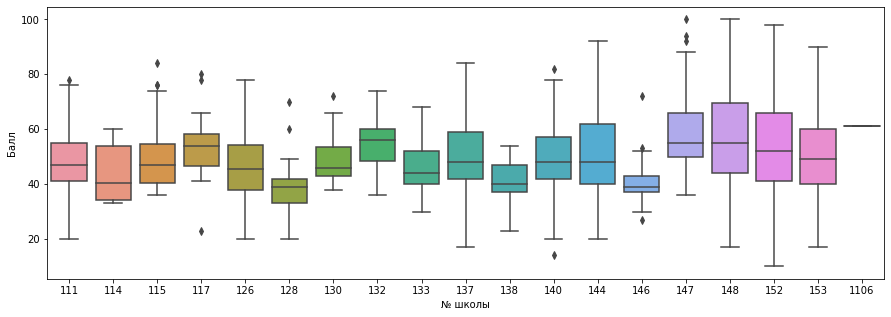

In [58]:
sns.boxplot(data=df, x='№ школы', y='Балл', ax=plt.subplots(figsize=(15, 5))[1])

Да, выбросы имеются, например в 147 школе сильно выделяется ученик, набравший 100 баллов. В других школах также имеются выбросы

# __Повышенной сложности:__

## 1.	Сколько всего заданий с кратким ответом? С развернутым ответом?

In [61]:
print('Всего', len(df['Задания с кратким ответом'][0]), 'заданий с кратким ответом')
print('Всего', df['Задания с развёрнутым ответом'][0].count('('), 'заданий с развернутым ответом')

Всего 27 заданий с кратким ответом
Всего 5 заданий с развернутым ответом


## 2.	Пусть задания с кратким ответом будут задания типа В. Соответственно всего по экзамену вопросов класса В: В1 … Вк  Посчитайте процент выполненных и невыполненных заданий по каждому вопросу класса В. Постройте гистограмму, позволяю щую увидеть данное распределение. Какие есть выпады по данному распределению?

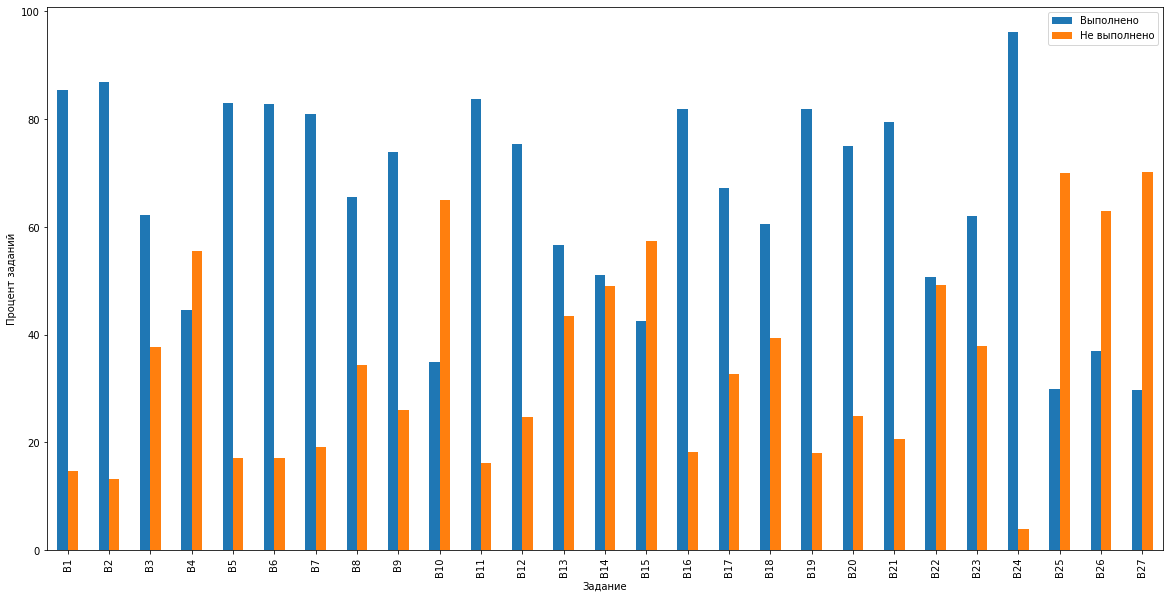

Из явных выпадов видно, что с заданием B24 справилось подавляющее большинство сдававших

## 3.	Аналогично и с типом С (ответы с развернутым ответом)

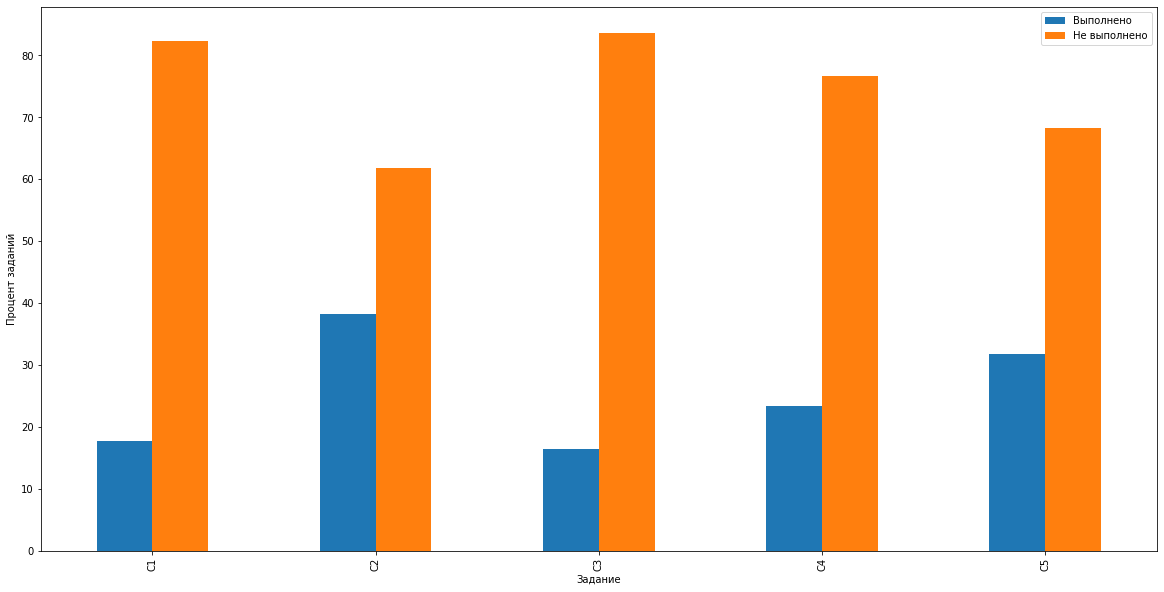

Явных выпадов не видно, но можно заметить, что с C2 справляется больше людей, чем с остальными задачами

## 4.	Сделайте анализ по двум школам:
* А) по всем выполненным заданиям типа В
* Б) по заданиям типа С больше 50%
* В) по среднему балу юношей и девушек


148     214
152     170
140     135
153     129
137      72
147      67
111      63
144      61
126      56
133      49
115      43
117      32
146      23
132      18
128      15
138      11
130      11
114      10
1106      1
Name: № школы, dtype: int64

In [238]:
first_school, second_school = 140, 153

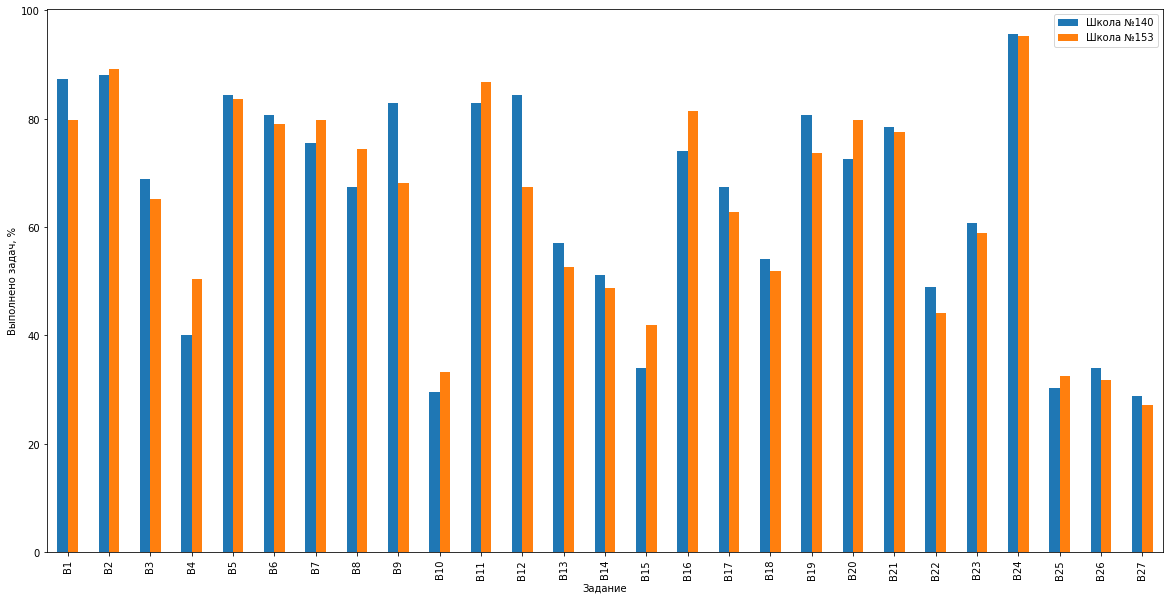

### Б) по заданиям типа С больше 50%

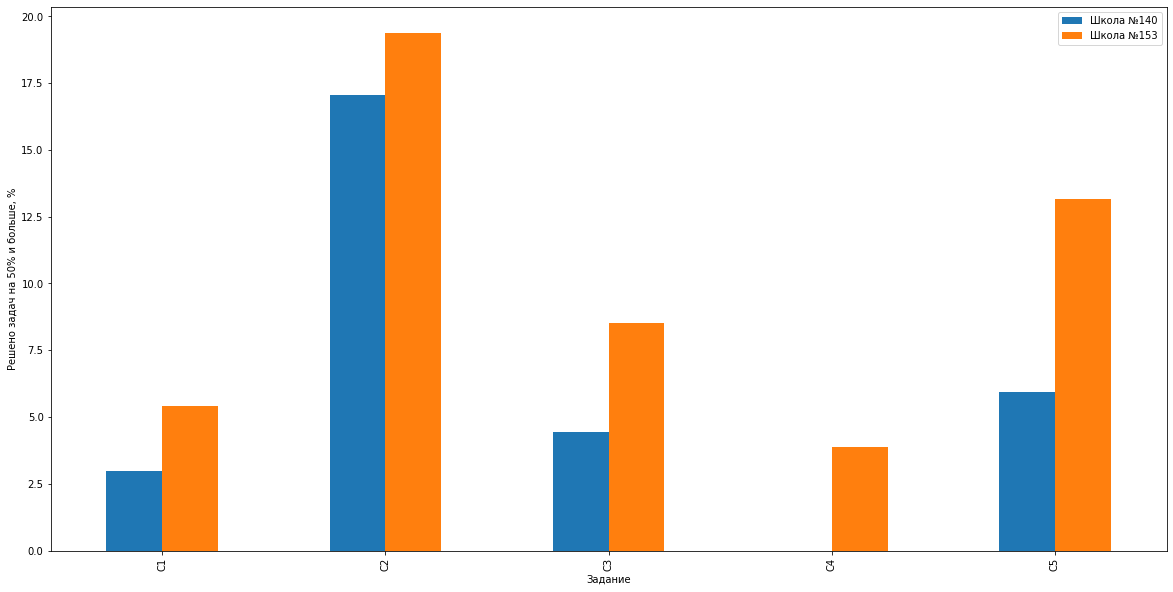

В школе №140 никто не решил С4 более, чем на 50%

### в) по среднему балу юношей и девушек

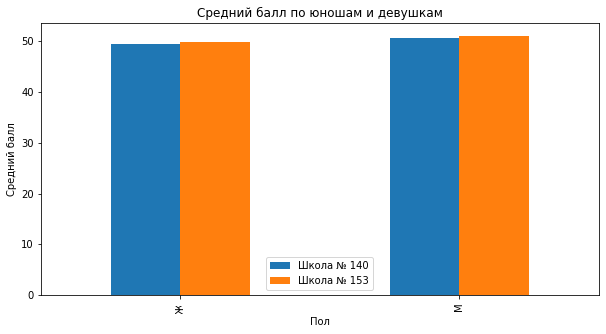